# Object Finder
Here, we'll explore finding objects in spectrographs produced from the LTO 21-cm data. The objective is to produce a list of objects from an input spectrograph. For each object, provide its bounding box, its object type and possibly some descriptive statistics.

## Get the Spectrograph
...need a function in utils that will pop this out
...need a function to plot the spectrograph

In [1]:
import numpy as np
import pandas as pd
from LTO_Utils import *
from os import listdir
from os.path import isfile, join
import re
from SpectroGraph import *


In [2]:
sprg = SpectroGraph('data', dFclip=(-700,700))

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
import matplotlib.colors as colors

%matplotlib inline
rcParams['figure.figsize'] = [10.0, 10.0]
rcParams['font.size'] = 14
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

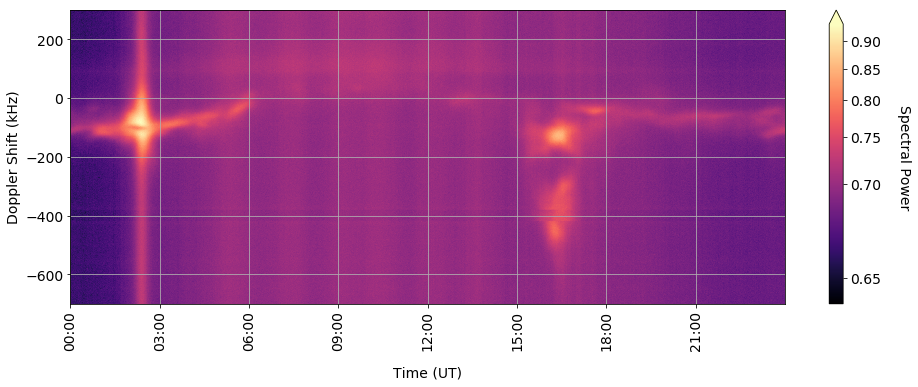

In [4]:
Xtimes, Yfreqs = np.meshgrid(sprg.times, sprg.freqs)

fmt = mdates.DateFormatter('%H:%M') #formatter to show just the hours and minutes

fig, ax = plt.subplots(figsize=(16,6))

pcm = ax.pcolormesh(Xtimes, Yfreqs, sprg.pwr,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')

ax.set_xticklabels([fmt(t) for t in ax.get_xticks() ], rotation=90)
ax.set_xlabel('Time (UT)', labelpad=15)
ax.set_ylabel('Doppler Shift (kHz)')
ax.set_ylim(-700,300) #to match the picture
ax.grid()
fig.subplots_adjust(bottom=0.2)
#fig.autofmt_xdate()
cbar=fig.colorbar(pcm, ax=ax, extend='max')
cbar.set_label('Spectral Power', rotation=270, labelpad=30)


#fig.show()


In [5]:
from skimage import measure

In [6]:
import pandas as pd


In [7]:
from skimage.measure import label, regionprops

In [8]:
label_image = label(sprg.pwr >= 0.75)
regprops = regionprops(label_image, sprg.pwr)

props =pd.DataFrame([[rp.label, rp.weighted_centroid, rp.area, rp.mean_intensity, rp.max_intensity] for rp in regprops if rp.area >= 100],
                               columns = ['FeatureId', 'WeightedCentroid','Area', 'MeanPower','MaxPower'])


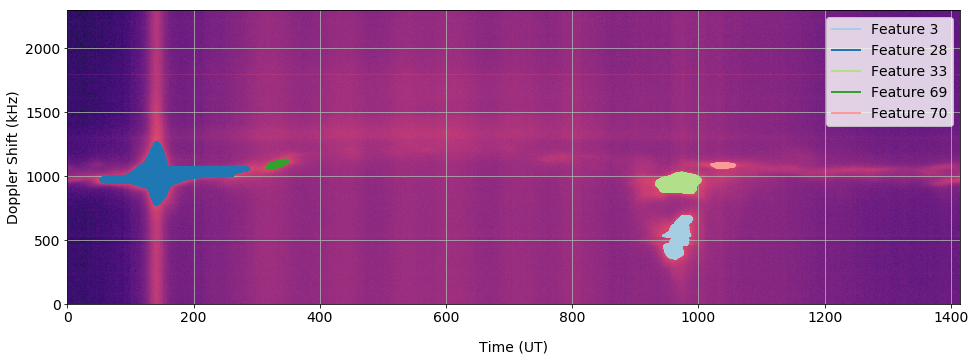

In [9]:

Xtimes, Yfreqs = np.meshgrid(sprg.times, sprg.freqs)

fmt = mdates.DateFormatter('%H:%M') #formatter to show just the hours and minutes

fig, ax = plt.subplots(figsize=(16,6))

cmap = cm.get_cmap('Paired')

#pcm = ax.pcolormesh(Xtimes, Yfreqs, sprg.pwr,
pcm = ax.pcolormesh(sprg.pwr,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')

#ax.set_xticklabels([fmt(t) for t in ax.get_xticks() ], rotation=90)
ax.set_xlabel('Time (UT)', labelpad=15)
ax.set_ylabel('Doppler Shift (kHz)')
#ax.set_ylim(-700,300) #to match the picture
for c,i in enumerate(props.FeatureId.tolist()):
    coords = regprops[i-1].coords
    ax.plot(coords[:, 1], coords[:, 0], linewidth=2, color=cmap(c), fillstyle='none',label='Feature '+str(i))
ax.grid()
fig.subplots_adjust(bottom=0.2)
ax.legend()
#fig.autofmt_xdate()
#cbar=fig.colorbar(pcm, ax=ax, extend='max')
#cbar.set_label('Spectral Power', rotation=270, labelpad=30)

In [10]:
props

,FeatureId,WeightedCentroid,Area,MeanPower,MaxPower
0,3,"(517.356966383, 967.69780298)",7932,0.759805,0.786659
1,28,"(1004.22546551, 148.282920683)",24223,0.799427,0.934163
2,33,"(941.124373217, 969.184765887)",7954,0.787234,0.859703
3,69,"(1089.5909084, 332.486655437)",1247,0.758213,0.771017
4,70,"(1079.29860984, 1039.35706653)",969,0.761048,0.779452


In [ ]:
len(sprg.data)

In [ ]:
len(sprg.freqs)

In [ ]:
sprg.describe()

In [ ]:
# Find contours at a constant value of 0.75
contours = measure.find_contours(sprg.pwr, 0.75)

In [ ]:
len(contours)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
#fig.suptitle('Effect of Different Noise Thresholds')
pcm = ax.pcolormesh(np.where(sprg.pwr>=0.75, sprg.pwr, 0),
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()),
                   cmap='binary')
ax.set_title('Threshold = 0.75')
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='r')
fig.colorbar(pcm, ax=ax, extend='max')

In [ ]:
Xtimes, Yfreqs = np.meshgrid(sprg.times, sprg.freqs)

fmt = mdates.DateFormatter('%H:%M') #formatter to show just the hours and minutes

fig, ax = plt.subplots(figsize=(16,6))

#pcm = ax.pcolormesh(Xtimes, Yfreqs, sprg.pwr,
pcm = ax.pcolormesh(sprg.pwr,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')

#ax.set_xticklabels([fmt(t) for t in ax.get_xticks() ], rotation=90)
ax.set_xlabel('Time (UT)', labelpad=15)
ax.set_ylabel('Doppler Shift (kHz)')
#ax.set_ylim(-700,300) #to match the picture
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color='b')
ax.grid()
fig.subplots_adjust(bottom=0.2)
#fig.autofmt_xdate()
cbar=fig.colorbar(pcm, ax=ax, extend='max')
cbar.set_label('Spectral Power', rotation=270, labelpad=30)


#fig.show()


In [ ]:
contours[1]

In [ ]:
sprg75=np.where(sprg.pwr>=0.75, sprg.pwr, 0)

In [ ]:
label_image = label(sprg75 >= 0.75)

In [ ]:
label_image.shape

In [ ]:
label_image.max()

In [ ]:
regprops = regionprops(label_image, sprg75)

In [ ]:
len(regprops)

In [ ]:
reg_areas = np.array([rp.area for rp in regprops])
    

In [ ]:
reg_areas

In [ ]:
(label_image == 3).sum()

In [ ]:
props =pd.DataFrame([[rp.label, rp.weighted_centroid, rp.area, rp.mean_intensity, rp.max_intensity] for rp in regprops if rp.area >= 100],
                               columns = ['FeatureId', 'WeightedCentroid','Area', 'MeanPower','MaxPower'])

In [ ]:
props.FeatureId.tolist()

In [ ]:
props

In [ ]:
regprops[2].centroid

In [ ]:
regprops[2].coords

In [ ]:
label_image[510:520,960:970]

In [ ]:
sprg75.dtype

In [ ]:
from scipy import ndimage

In [ ]:
labs, nobj = ndimage.label(sprg75)

In [ ]:
nobj

In [ ]:
objs = ndimage.find_objects(labs)

In [ ]:
objs[3:6]

In [ ]:
s3 = objs[3]

In [ ]:
s3

In [ ]:
s3[0]

In [ ]:
s3[0].start

In [ ]:
s3[0].stop 

In [ ]:
def obj_to_rect(obj):
    rowslice = obj[0]
    colslice = obj[1]
    
    lower_left = ( colslice.start, rowslice.start)
    height  = rowslice.stop - rowslice.start
    width  = colslice.stop - colslice.start
    
    return lower_left, width, height

In [ ]:
obj_to_rect(s3)

In [ ]:

fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(sprg.pwr,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')
fig.colorbar(pcm, ax=ax, extend='max')

# Add the patch to the Axes
for o in objs:
    origin, width, height = obj_to_rect(o)
    rect = patches.Rectangle(origin,width,height,linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)


In [ ]:
#rect2 = patches.Rectangle((100,800),100,300,linewidth=3,edgecolor='r',facecolor='none')
fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(sprg75[800:1100, 925:1025],
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='binary')
fig.colorbar(pcm, ax=ax, extend='max')
#ax.set_xlim(925,1025)
#ax.set_ylim(800, 1100)

## Test Case
1) Make an n x n matrix of random numbers
2) create a mask of known regions, multiply by the mask
3) find the objects

In [ ]:
n = 100
test_data = np.random.randn(n*n).reshape(n,n)+300 # to move it away from zero
mask = np.zeros(test_data.shape)
mask[10:30, 10:30] = 1
mask[60:80, 60:80] = 1
test_data = test_data * mask

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(test_data,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='binary')
fig.colorbar(pcm, ax=ax, extend='max')



In [ ]:
labs, nobj = ndimage.label(test_data)

In [ ]:
nobj

In [ ]:
objs = ndimage.find_objects(labs)

In [ ]:
objs

In [ ]:
for o in objs:
    print (str(obj_to_rect(o)))

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(test_data,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='binary')
fig.colorbar(pcm, ax=ax, extend='max')

# Add the patch to the Axes
for o in objs:
    origin, width, height = obj_to_rect(o)
    rect = patches.Rectangle(origin,width,height,linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

## Vary the weight matrix

In [ ]:
sprg75=np.where(sprg.pwr>=0.75, sprg.pwr, 0)
struct = ndimage.generate_binary_structure(2,2)
labs, nobj = ndimage.label(sprg75, structure=struct)
objs = ndimage.find_objects(labs)

In [ ]:
nobj

In [ ]:

fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(sprg.pwr,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')
fig.colorbar(pcm, ax=ax, extend='max')

# Add the patch to the Axes
for o in objs:
    origin, width, height = obj_to_rect(o)
    rect = patches.Rectangle(origin,width,height,linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
#ax.set_xlim(925,1025)
#ax.set_ylim(800, 1100)

In [ ]:
ndimage.generate_binary_structure(2,2).shape

In [ ]:
sprg75=np.where(sprg.pwr>=0.75, sprg.pwr, 0)
#struct = ndimage.generate_binary_structure(2,2)
struct = np.ones((25,25), dtype=bool)
labs, nobj = ndimage.label(sprg75, structure=struct)
objs = ndimage.find_objects(labs)

In [ ]:
#rect2 = patches.Rectangle((100,800),100,300,linewidth=3,edgecolor='r',facecolor='none')
fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(sprg75,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')
fig.colorbar(pcm, ax=ax, extend='max')
ax.set_xlim(100,200)
ax.set_ylim(800, 1100)


In [ ]:
sprg75[s3]

In [ ]:
sprg75[objs[0]]

In [ ]:
objs[0]

In [ ]:
sprg75[s3].sum()

In [ ]:
(sprg75[s3] != 0.0).sum()

In [ ]:
(sprg75[s3] == 0.0).sum()

In [ ]:

fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(sprg.pwr,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    norm=colors.PowerNorm(gamma=1./2.),
                    cmap='magma')
fig.colorbar(pcm, ax=ax, extend='max')

# Add the patch to the Axes
for o in [s3]:
    origin, width, height = obj_to_rect(o)
    rect = patches.Rectangle(origin,width,height,linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [ ]:
sprg75[s3].shape

In [ ]:
a = np.array([[0,0,1,1,0,0],
              [0,0,0,1,0,0],
              [1,1,0,0,1,0],
              [0,0,0,1,0,0]])
labeled_array, num_features = ndimage.label(a)

In [ ]:
a

In [ ]:
labeled_array

In [ ]:
objs = ndimage.find_objects(labeled_array)

In [ ]:
objs

In [ ]:
obj_to_rect(objs[0])

In [ ]:

fig, ax = plt.subplots(figsize=(16,4))
pcm = ax.pcolormesh(sprg75,
                   #norm=colors.LogNorm(vmin=pwr.min(), vmax=pwr.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='binary')
fig.colorbar(pcm, ax=ax, extend='max')

# Add the patch to the Axes
for o in objs:
    origin, width, height = obj_to_rect(o)
    rect = patches.Rectangle(origin,width,height,linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

In [ ]:
nz = (sprg75[s3]>0).sum()

In [ ]:
nz

In [ ]:
sprg75[s3].sum()/nz

In [ ]:
ndimage.generate_binary_structure(2,0)

In [ ]:
ndimage.generate_binary_structure(2,1)

In [ ]:
ndimage.generate_binary_structure(2,2)